In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Auto.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
#Checking missing values, Data type and unique values in the dataset
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],5))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)

In [6]:
Missing_Values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,mpg,397,0,0.0,float64,"[18.0, 15.0, 16.0, 17.0, 14.0, 24.0, 22.0, 21....",129
1,cylinders,397,0,0.0,int64,"[8, 4, 6, 3, 5]",5
2,displacement,397,0,0.0,float64,"[307.0, 350.0, 318.0, 304.0, 302.0, 429.0, 454...",82
3,horsepower,397,0,0.0,object,"[130, 165, 150, 140, 198, 220, 215, 225, 190, ...",94
4,weight,397,0,0.0,int64,"[3504, 3693, 3436, 3433, 3449, 4341, 4354, 431...",350
5,acceleration,397,0,0.0,float64,"[12.0, 11.5, 11.0, 10.5, 10.0, 9.0, 8.5, 8.0, ...",95
6,year,397,0,0.0,int64,"[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8...",13
7,origin,397,0,0.0,int64,"[1, 3, 2]",3
8,name,397,0,0.0,object,"[chevrolet chevelle malibu, buick skylark 320,...",304


In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [8]:
print(df.mean())

mpg               23.515869
cylinders          5.458438
displacement     193.532746
weight          2970.261965
acceleration      15.555668
year              75.994962
origin             1.574307
dtype: float64


In [9]:
print(df.std())

mpg               7.825804
cylinders         1.701577
displacement    104.379583
weight          847.904119
acceleration      2.749995
year              3.690005
origin            0.802549
dtype: float64


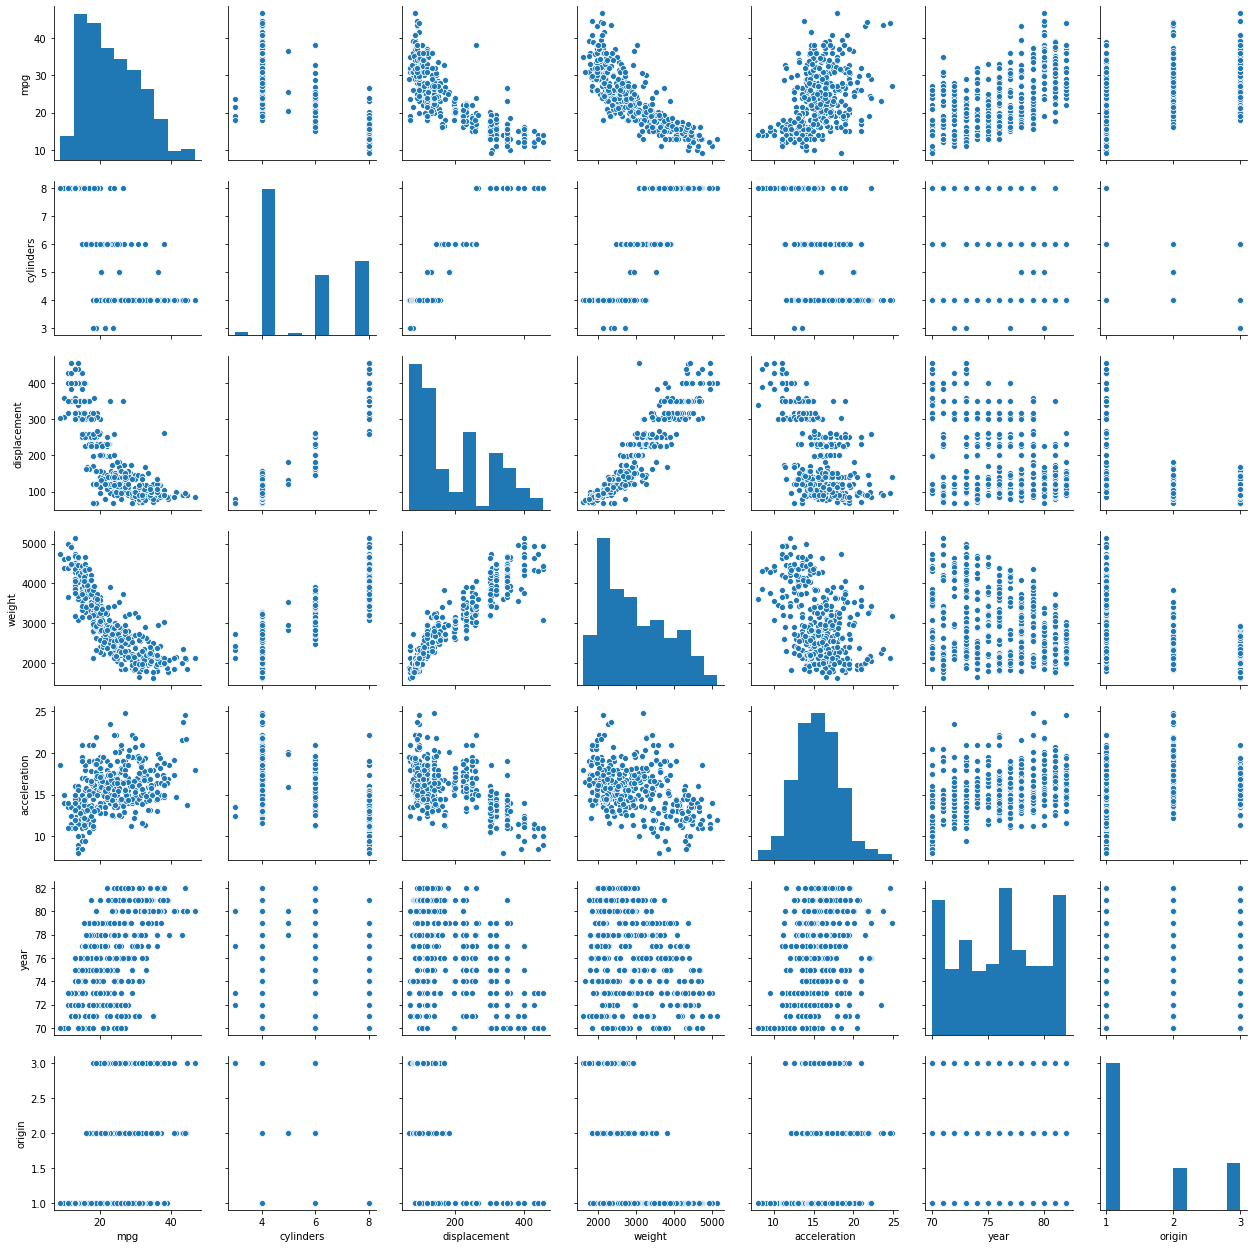

In [10]:
sns.pairplot(df)

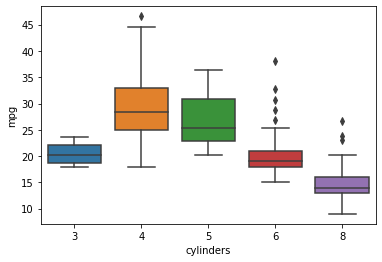

In [11]:
sns.boxplot(x='cylinders',y='mpg',data=df)
#vehicle with 4 cylinders have high mpg

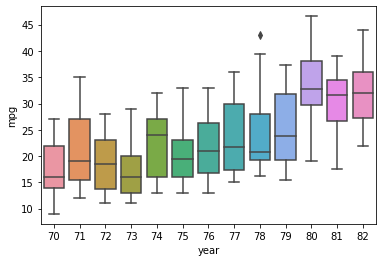

In [12]:
sns.boxplot(x='year',y='mpg',data=df)
#vehicles in 80's have higher mpg

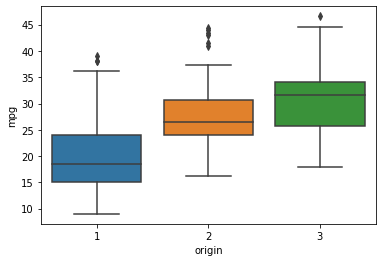

In [13]:
sns.boxplot(x='origin',y='mpg',data=df)
#vehicles in origin 3 have higher mpg

In [14]:
#Correlation of data
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# we can see there is high correlation fos some features
#there is a strong Linear relationship between mpg and almost all the features

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1,-0.78,-0.8,-0.83,0.42,0.58,0.56
cylinders,-0.78,1,0.95,0.9,-0.5,-0.35,-0.56
displacement,-0.8,0.95,1,0.93,-0.54,-0.37,-0.61
weight,-0.83,0.9,0.93,1,-0.42,-0.31,-0.58
acceleration,0.42,-0.5,-0.54,-0.42,1,0.28,0.21
year,0.58,-0.35,-0.37,-0.31,0.28,1,0.18
origin,0.56,-0.56,-0.61,-0.58,0.21,0.18,1
